# Séries Temporais

## Aula 01: Coleta de dados e primeiras análises

Os dados foram extraídos do site https://www.seade.gov.br/coronavirus/, mas foram disponibilizados para os alunos em https://github.com/alura-cursos/Prophet_covid/tree/main

Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import autocorrelation_plot

In [2]:
#Para ignorar os avisos do pandas
warnings.filterwarnings('ignore') 

Leitura dos dados

In [3]:
#Dados no github
url = "https://github.com/cmattosr/bootcampDS_Mod03/raw/main/dados/dados_covid_sp.zip"
dados = pd.read_csv(url, sep=";")
dados

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286173,Ignorado,9999999,8,5,2021-05-08,820,116,"0,000000e+00","10,0000000",5,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",18
286174,Ignorado,9999999,9,5,2021-05-09,756,-64,"0,000000e+00","7,8571429",16,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286175,Ignorado,9999999,10,5,2021-05-10,703,-53,"0,000000e+00","3,8571429",9,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286176,Ignorado,9999999,11,5,2021-05-11,744,41,"0,000000e+00","4,4285714",3,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19


In [4]:
#mudando o campo "datahora" para o formato de data
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

Parâmetros para configurações dos gráficos

In [5]:
mpl.rcParams["font.size"] = 18
mpl.rcParams["figure.figsize"] = (20,8)

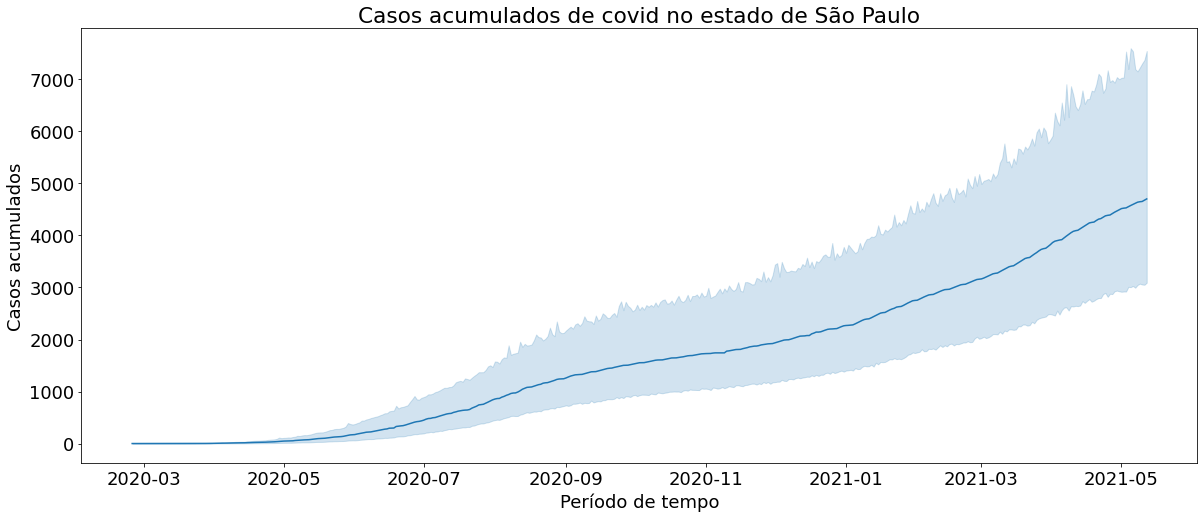

In [6]:
#número de casos, vamos utilizar o seaborn
sns.lineplot(x="datahora", y="casos", data=dados)
plt.title('Casos acumulados de covid no estado de São Paulo')
plt.ylabel('Casos acumulados')
plt.xlabel('Período de tempo')
plt.show()

A linha azul é a média, a região azul clara é a representação entre os menores e os maiores valores de casos (estamos plotando todos os municípios do estado de SP)

$$ e^x $$

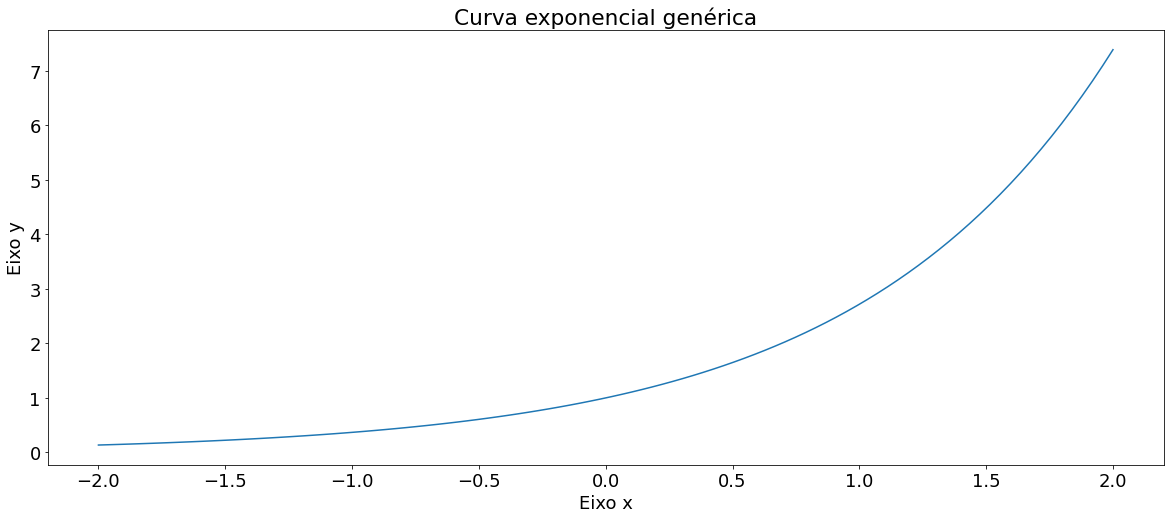

In [7]:
#vamos gerar uma curva exponencial genérica para verificarmos se temos um crescimento exponencial de casos de covid em SP
eixo_x = np.linspace(-2,2,100)
eixo_y_exp = np.exp(eixo_x)

sns.lineplot(x=eixo_x, y=eixo_y_exp)
plt.title("Curva exponencial genérica")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.show()

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

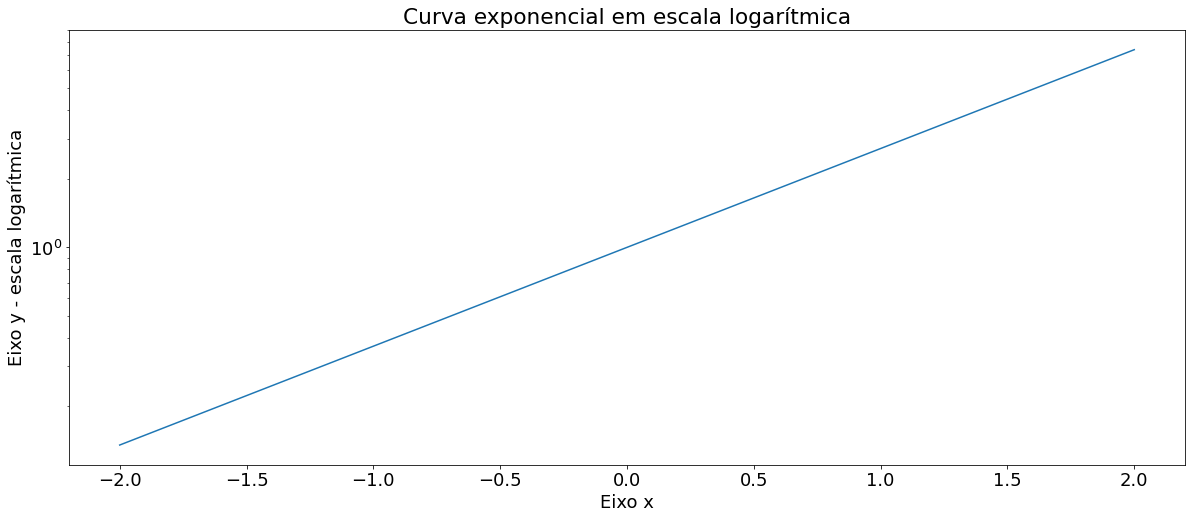

In [8]:
#vamos criar uma linha logarítmica a partir dos dados exponenciais, gerando uma reta
#o nome dessa gráfico é monolog
sns.lineplot(x=eixo_x, y=eixo_y_exp)
mpl.pyplot.yscale("log")
plt.title("Curva exponencial em escala logarítmica")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y - escala logarítmica")
plt.show()

Se gerarmos uma curva logarítmica a partir da linha dos dados (transformação logarítmica) de covid e ela ficar uma reta, quer dizer que temos um crescimento exponencial, conforme o exemplo acima

In [9]:
#vamos fazer somente para o município de São Paulo
dados_sp = dados.query("nome_munic == 'São Paulo'")
dados_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19


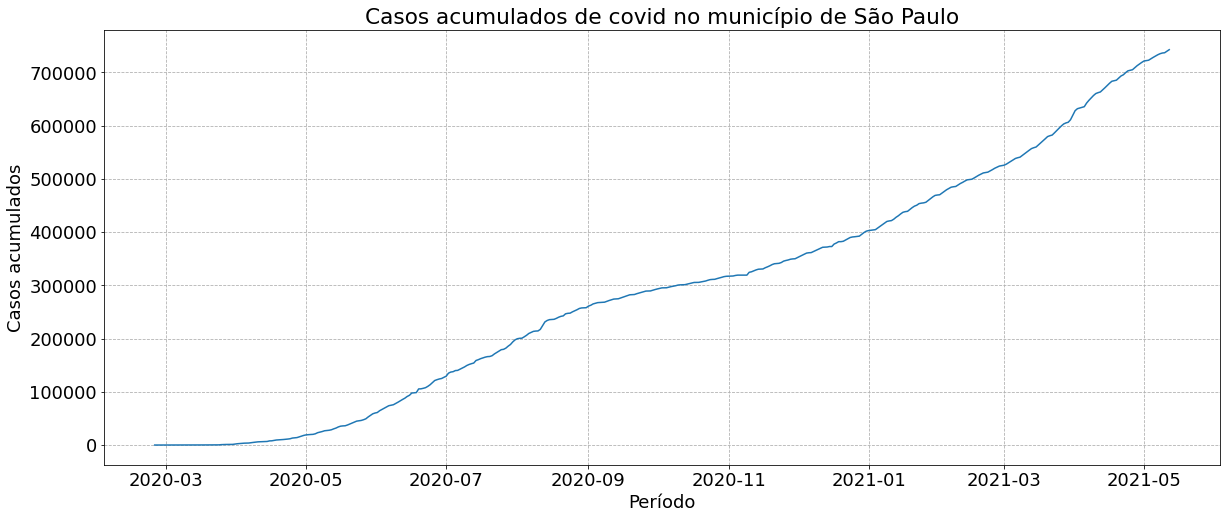

In [10]:
ax = sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.title('Casos acumulados de covid no município de São Paulo')
plt.xlabel('Período')
plt.ylabel('Casos acumulados')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

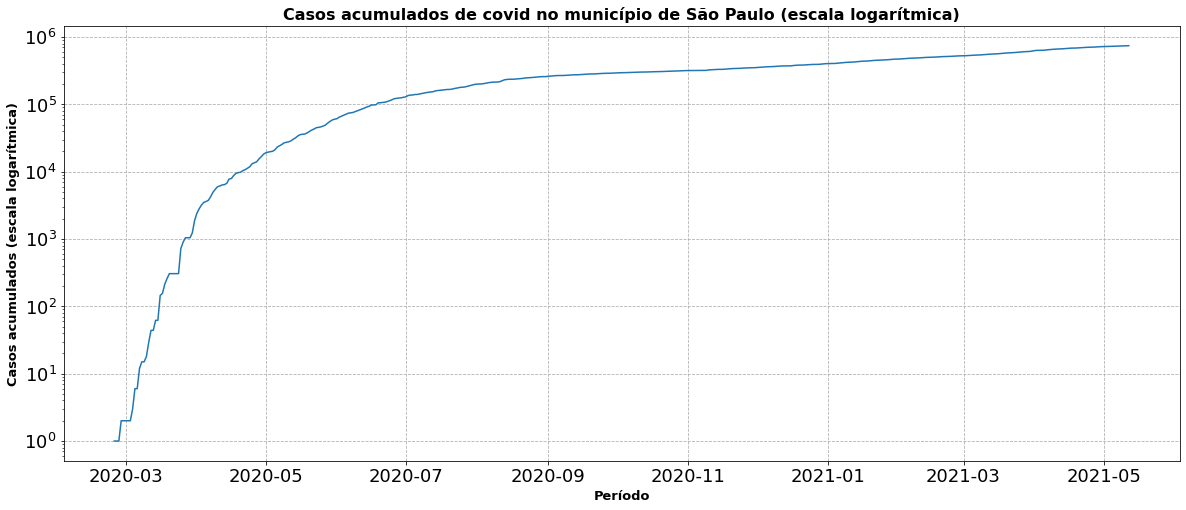

In [11]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")
plt.title('Casos acumulados de covid no município de São Paulo (escala logarítmica)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos acumulados (escala logarítmica)', fontdict={'fontsize':13, 'fontweight':'bold'})
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

### Desafio 01: filtrar a base de dados sem utilizar a função .query

In [12]:
#usatr o loc
dados.loc[dados["nome_munic"] == "São Paulo", :]

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19


### Desafio 02: Escolher outro municípioo para fazer a análise

In [13]:
#Município escolhido foi Campinas
dados_campinas = dados.loc[dados["nome_munic"] == "Campinas", :]
dados_campinas

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
108,Campinas,3509502,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
753,Campinas,3509502,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
1398,Campinas,3509502,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2043,Campinas,3509502,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
2688,Campinas,3509502,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,1175501,192796,79457,0,8.0,"-22,9053","-47,0659",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282618,Campinas,3509502,8,5,2021-05-08,79101,277,"6,729131e+03","277,1428571",3129,...,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",18
283263,Campinas,3509502,9,5,2021-05-09,79146,45,"6,732959e+03","277,2857143",3129,...,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",19
283908,Campinas,3509502,10,5,2021-05-10,79166,20,"6,734660e+03","276,7142857",3129,...,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",19
284553,Campinas,3509502,11,5,2021-05-11,79468,302,"6,760352e+03","258,0000000",3160,...,Campinas,3,1175501,192796,79457,>5000,1.0,"-22,9053","-47,0659",19


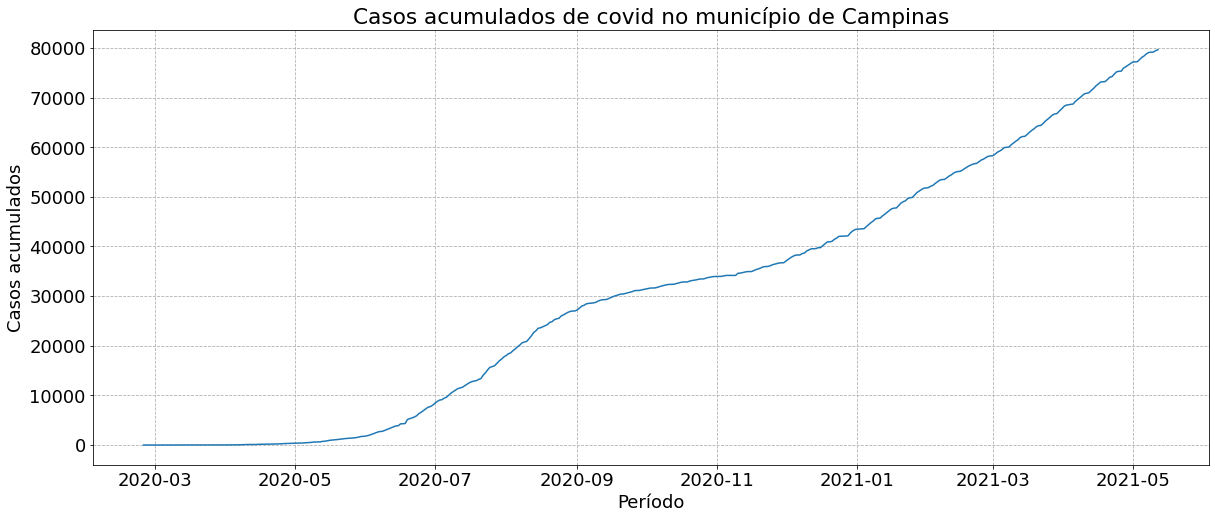

In [14]:
#plotar os casos de covid em Campinas
sns.lineplot(x="datahora", y="casos", data=dados_campinas)
plt.title('Casos acumulados de covid no município de Campinas')
plt.xlabel('Período')
plt.ylabel('Casos acumulados')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

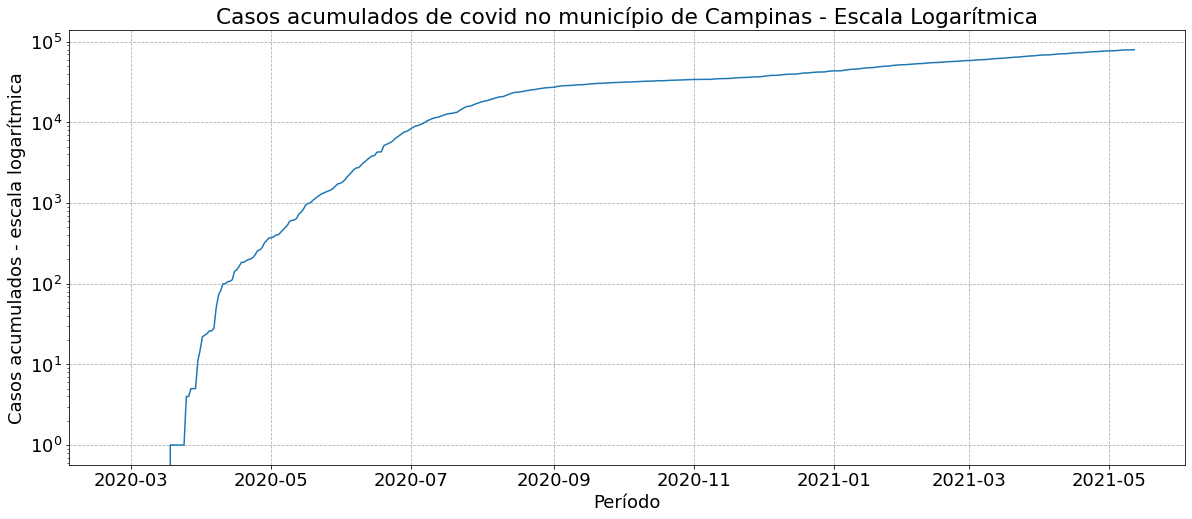

In [15]:
#vamos gerar uma curva logarítmica para os casos de covid em Campinas
sns.lineplot(x="datahora", y="casos", data=dados_campinas)
mpl.pyplot.yscale("log")
plt.title('Casos acumulados de covid no município de Campinas - Escala Logarítmica')
plt.xlabel('Período')
plt.ylabel('Casos acumulados - escala logarítmica')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

## Aula02: Taxa de crescimento e média móvel

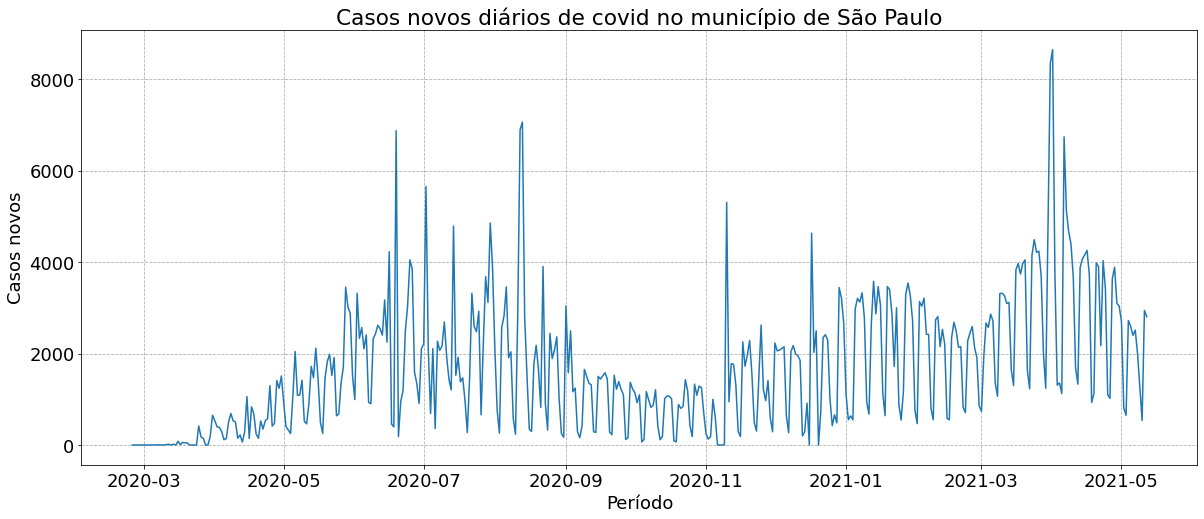

In [16]:
#casos novos do município de São Paulo
sns.lineplot(x="datahora", y="casos_novos", data=dados_sp)
plt.title('Casos novos diários de covid no município de São Paulo')
plt.xlabel('Período')
plt.ylabel('Casos novos')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

Diferenciação: é a taxa de crescimento através da diferença entre os pontos
equação da reta: y = ax + b, fazendo a diferenciação nós encontramos o coeficiente angular da reta, no nosso exemplo o coeficiente angular é 1: y = 1x + b

In [17]:
#exemplo de diferenciação
#criação de um dataframe com uma reta linear
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))
dados_exemplo

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


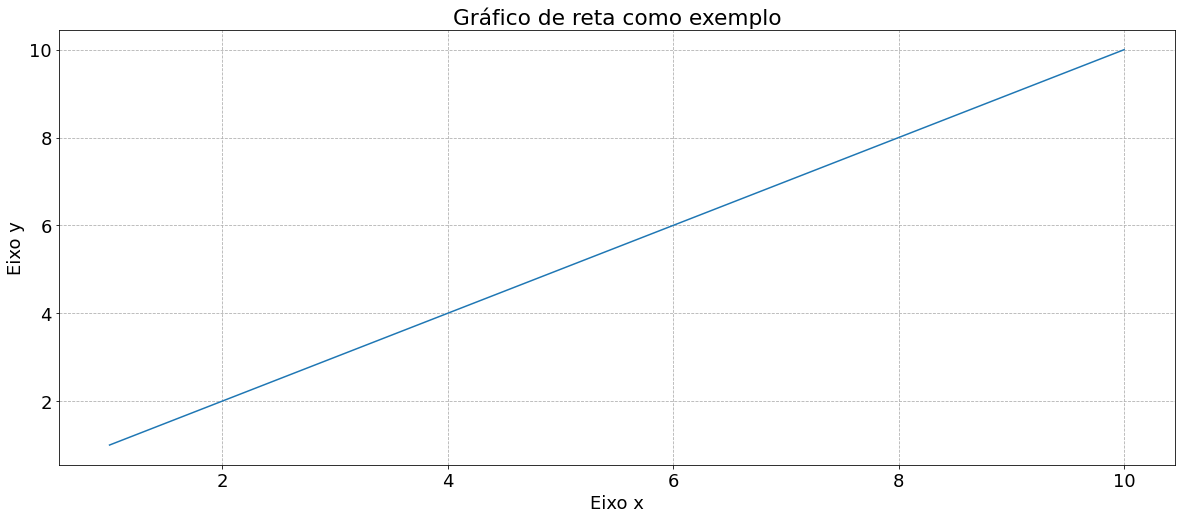

In [18]:
sns.lineplot(x = 0, y=0, data=dados_exemplo)
plt.title('Gráfico de reta como exemplo')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

In [19]:
#vamos diferenciar esse exemplo
#nova coluna no dataframe
dados_exemplo["diferenciado"] = dados_exemplo.diff()
dados_exemplo

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,1.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


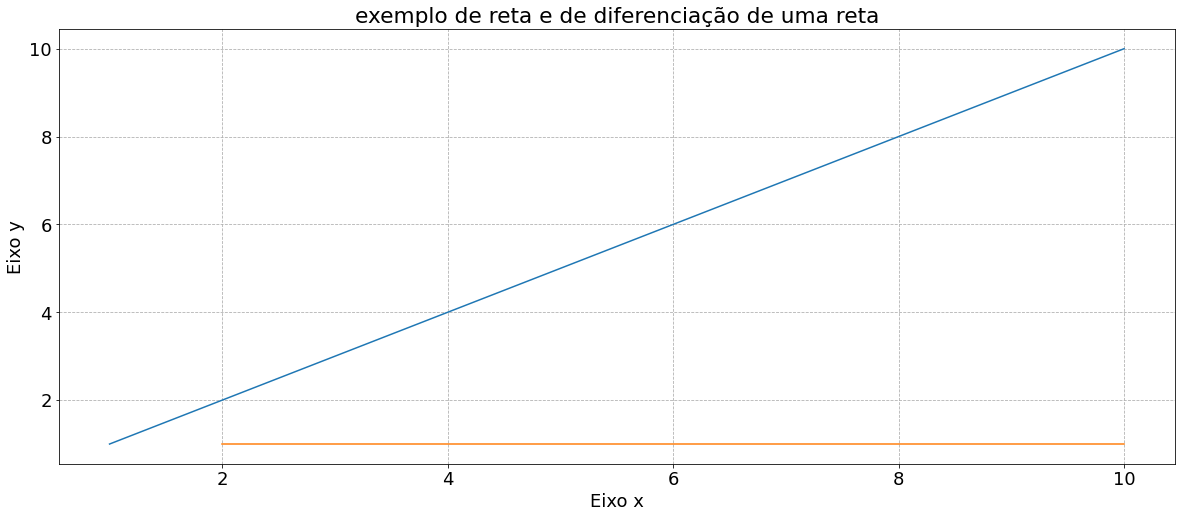

In [20]:
sns.lineplot(x = 0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y="diferenciado", data=dados_exemplo)
plt.title('exemplo de reta e de diferenciação de uma reta')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

In [21]:
#vamos voltar para os dados de São Paulo
#diferenciação
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()
dados_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0


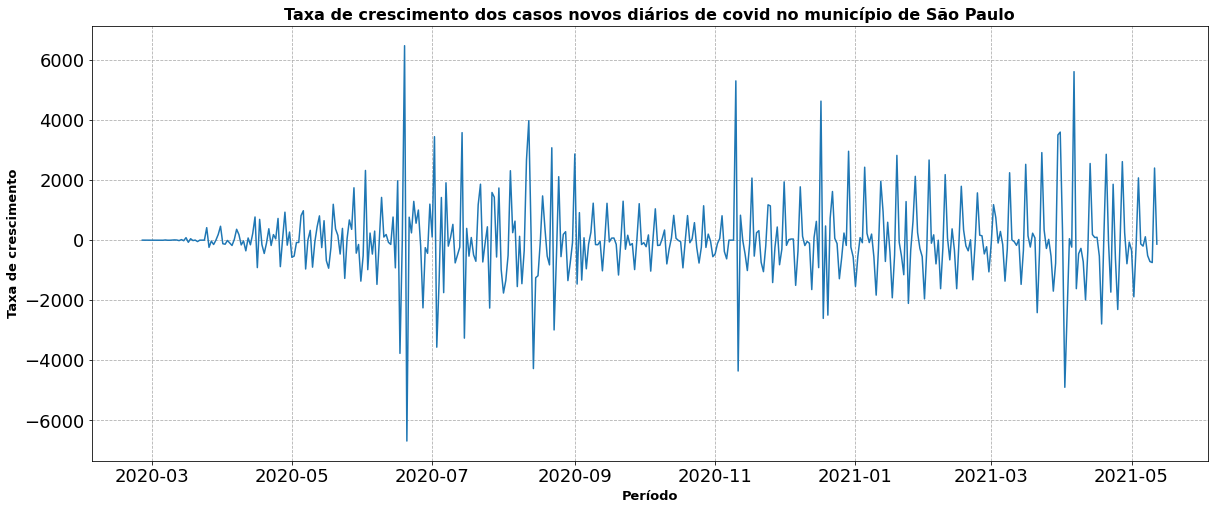

In [22]:
sns.lineplot(x="datahora", y="taxa_de_crescimento_casos", data=dados_sp)
plt.title('Taxa de crescimento dos casos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

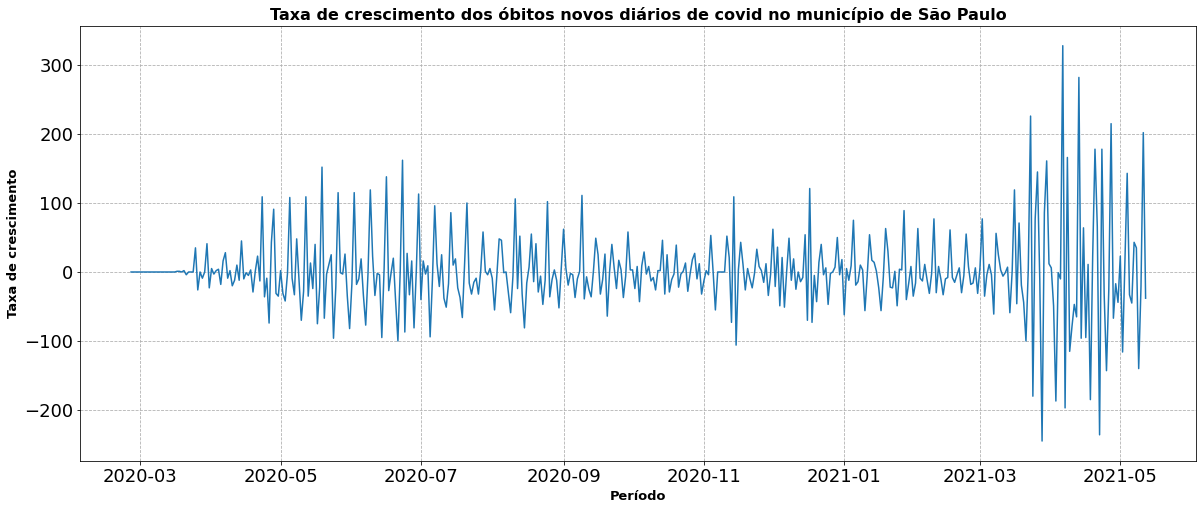

In [23]:
sns.lineplot(x="datahora", y="taxa_de_crescimento_obitos", data=dados_sp)
plt.title('Taxa de crescimento dos óbitos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

### Desafio 01: Eliminar os avisos (warnings) 

- Nos gráficos adicionar "plt.show()"
- Para os avisos do pandas:
    - import warnings
    - warnings.filterwarnings('ignore')

### Desafio 02: Verificar se a taxa de casos novos coincide com a taxa de óbitos novos

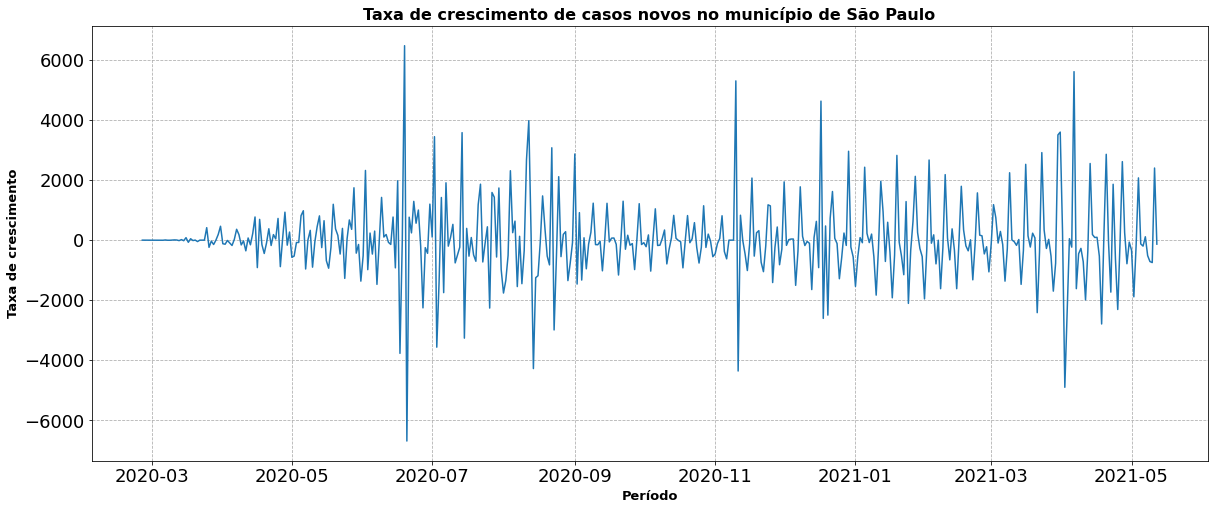

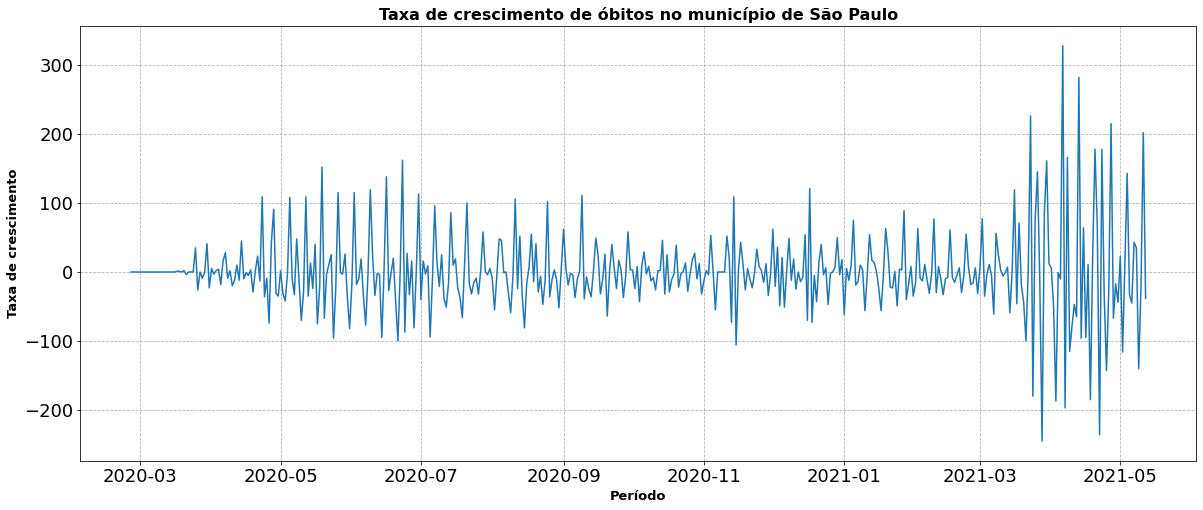

In [24]:
sns.lineplot(x="datahora", y="taxa_de_crescimento_casos", data=dados_sp)
plt.title('Taxa de crescimento de casos novos no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()
sns.lineplot(x="datahora", y="taxa_de_crescimento_obitos", data=dados_sp)
plt.title('Taxa de crescimento de óbitos no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

Utilizando apenas o visual para fazer uma comparação, não parece ter uma correlação entre os picos de casos novos e de óbitos, uma explicação é porque há um intervalo entre a notificação do caso e o desenvilvimento da doença que ocasiona em óbito

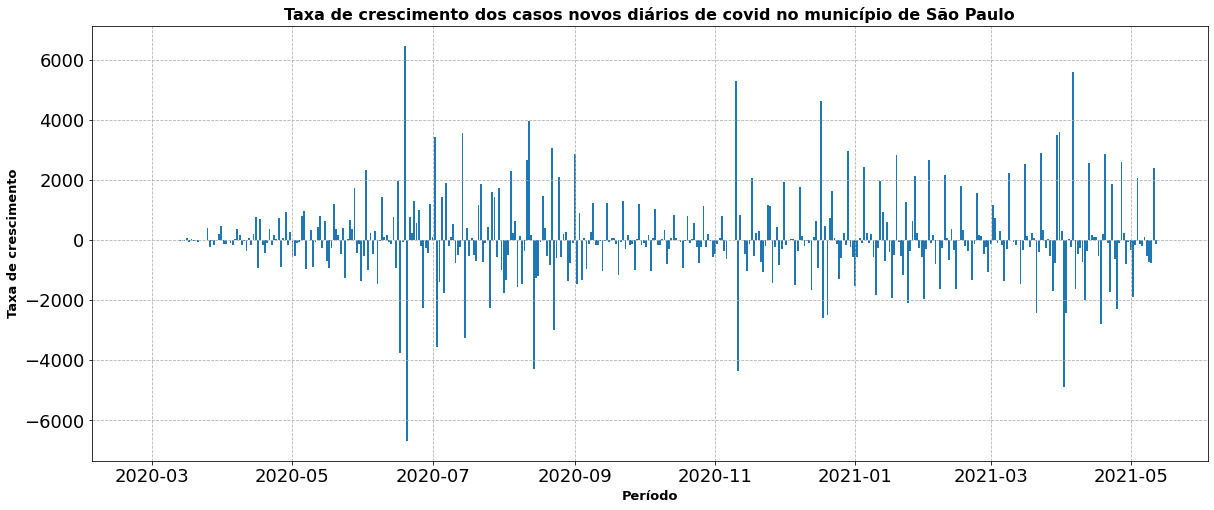

In [25]:
#plotar um gráfico de barras para uma visualização diferentre dos dados
plt.bar(dados_sp["datahora"], dados_sp["taxa_de_crescimento_casos"])
plt.title('Taxa de crescimento dos casos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

In [26]:
#vamos separar os anos de 2020 e 2021 para uma melhor visualização
dados_sp["ano"] = pd.DatetimeIndex(dados_sp["datahora"]).year
dados_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,2020
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,2020
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021


In [27]:
#criar um  novo dataframe para o ano de 2021
dados_2021 = dados_sp.query("ano == 2021")
dados_2021

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021


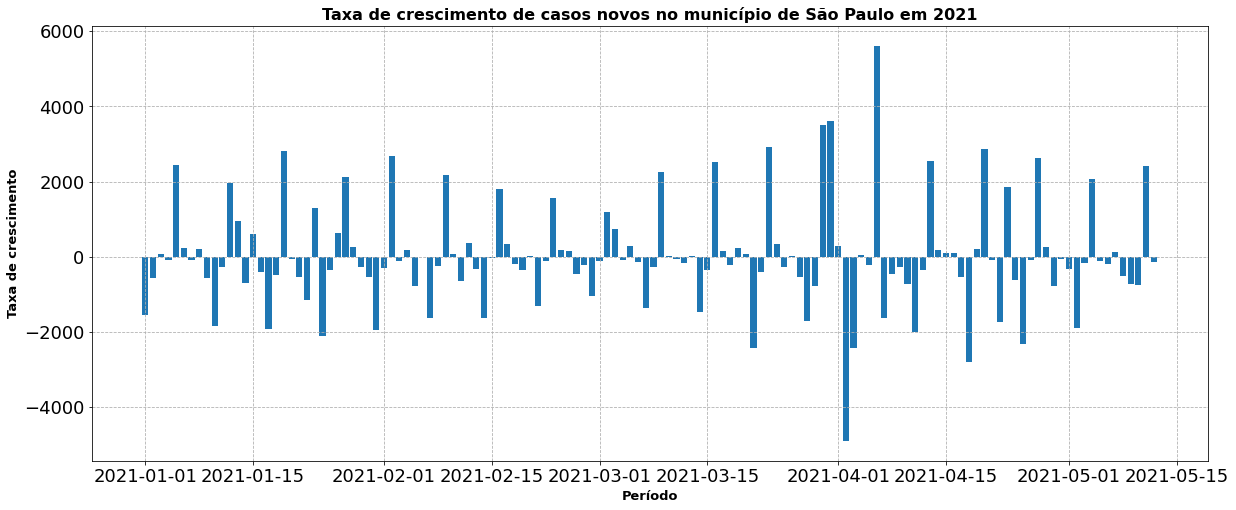

In [28]:
plt.bar(dados_2021["datahora"], dados_2021["taxa_de_crescimento_casos"])
plt.title('Taxa de crescimento de casos novos no município de São Paulo em 2021', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

### Desafio 03: Melhorar as visualizações de gráficos (títulos, labels, etc)

Foram colocados títulos e nomes dos eixos em todos os gráficos, assim como um grid para facilitar a visualização

In [29]:
#plotar a média patra termis uma idea de tendência
#vamos trabalhar com média móvel com janela de 7 dias
#a média móvel suaviza os picos dos gráficos, suaviza a sazonalidade
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7, center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7, center=False).mean()
dados_sp.head(15)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,2020,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,2020,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,2020,NaN,NaN
3787,São Paulo,3550308,1,3,2020-03-01,2,0,"1,684968e-02","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",10,0.0,0.0,2020,NaN,NaN
4432,São Paulo,3550308,2,3,2020-03-02,2,0,"1,684968e-02","0,1428571",0,...,<50,7.0,"-23,5329","-46,6395",10,0.0,0.0,2020,0.142857,0.0
5077,São Paulo,3550308,3,3,2020-03-03,2,0,"1,684968e-02","0,1428571",0,...,<50,7.0,"-23,5329","-46,6395",10,0.0,0.0,2020,0.142857,0.0
5722,São Paulo,3550308,4,3,2020-03-04,3,1,"2,527452e-02","0,2857143",0,...,<50,7.0,"-23,5329","-46,6395",10,1.0,0.0,2020,0.285714,0.0
6367,São Paulo,3550308,5,3,2020-03-05,6,3,"5,054905e-02","0,7142857",0,...,<50,7.0,"-23,5329","-46,6395",10,2.0,0.0,2020,0.714286,0.0


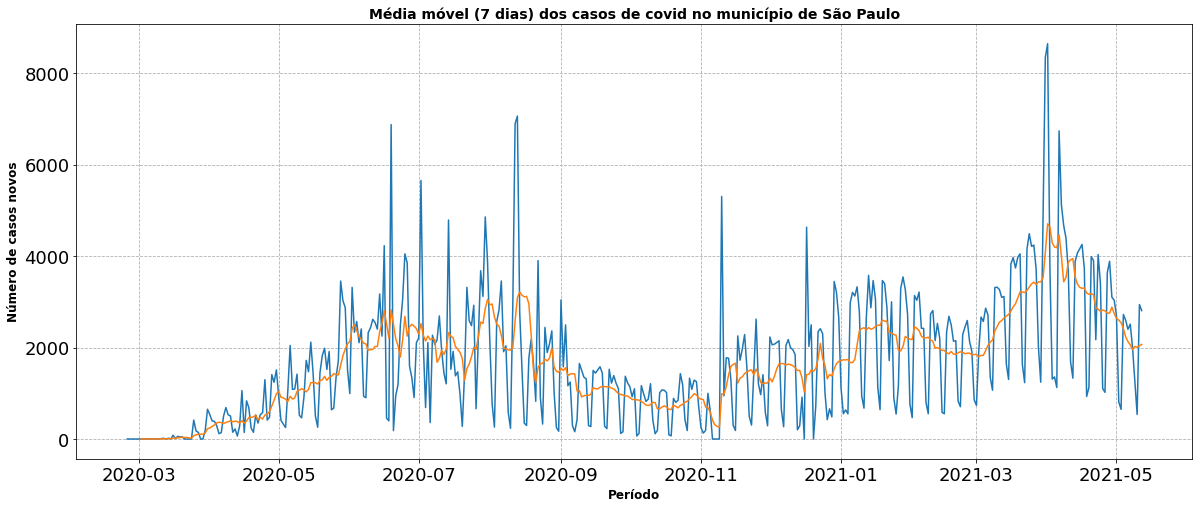

In [30]:
sns.lineplot(x="datahora", y="casos_novos", data=dados_sp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_sp)
plt.title('Média móvel (7 dias) dos casos de covid no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.grid(linestyle = '--')
plt.show()

### Desafio 04: Plotar a média móvel de óbitos. Mudar os gráficos de casos de linha para barra

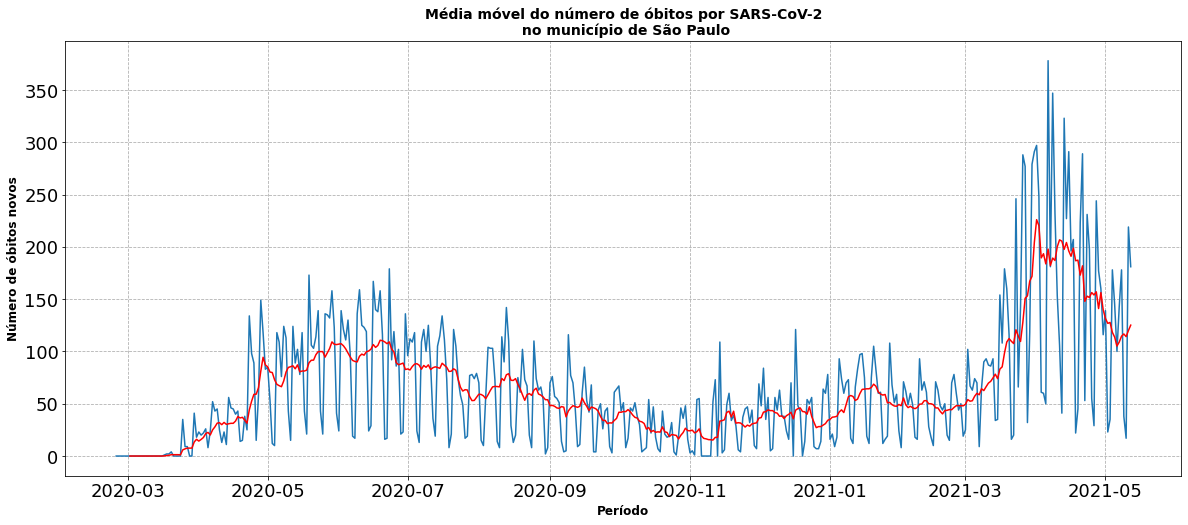

In [31]:
#Média móvel de óbitos
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp, color= 'red')
plt.title('Média móvel do número de óbitos por SARS-CoV-2\n no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.grid(linestyle = '--')
plt.show()

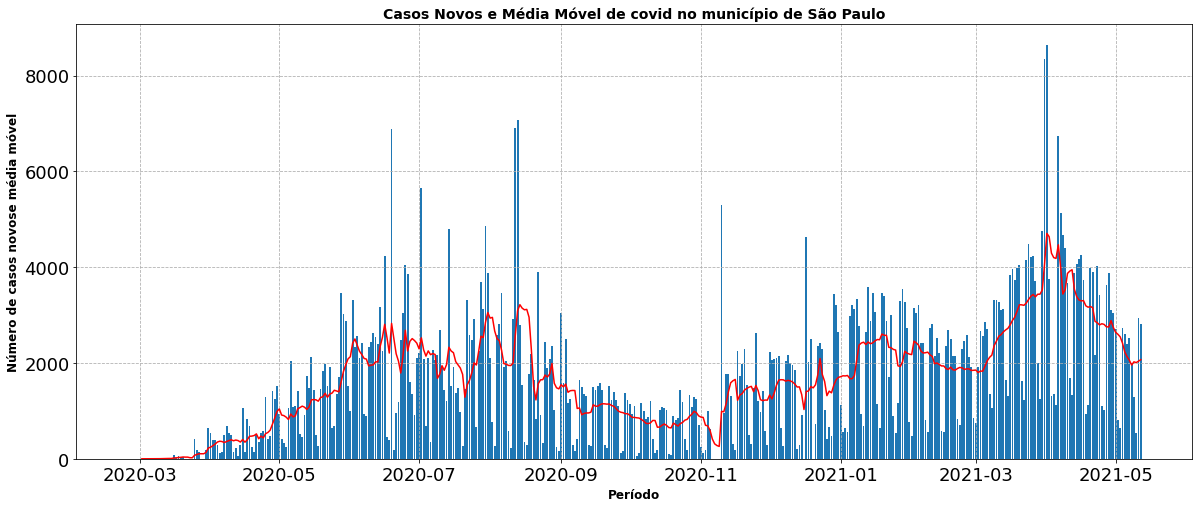

In [32]:
#Gráfico de casos em barra ao invés de linha
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'])
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp, color= 'red')
plt.title('Casos Novos e Média Móvel de covid no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novose média móvel', fontsize=12, weight= 'bold')
plt.grid(linestyle = '--')
plt.show()

## Aula 03: Correlação e função de autocorrelação

## Sazonalidade e Correlação de dados

<AxesSubplot:xlabel='casos_novos', ylabel='casos_novos'>

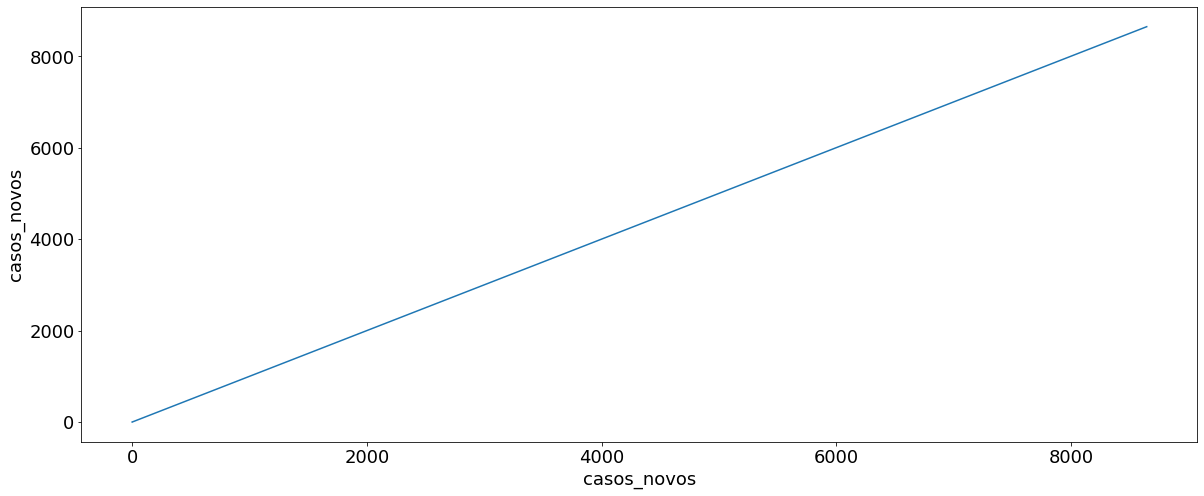

In [33]:
#correlação perfeita
sns.lineplot(x="casos_novos", y="casos_novos", data=dados_sp)

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

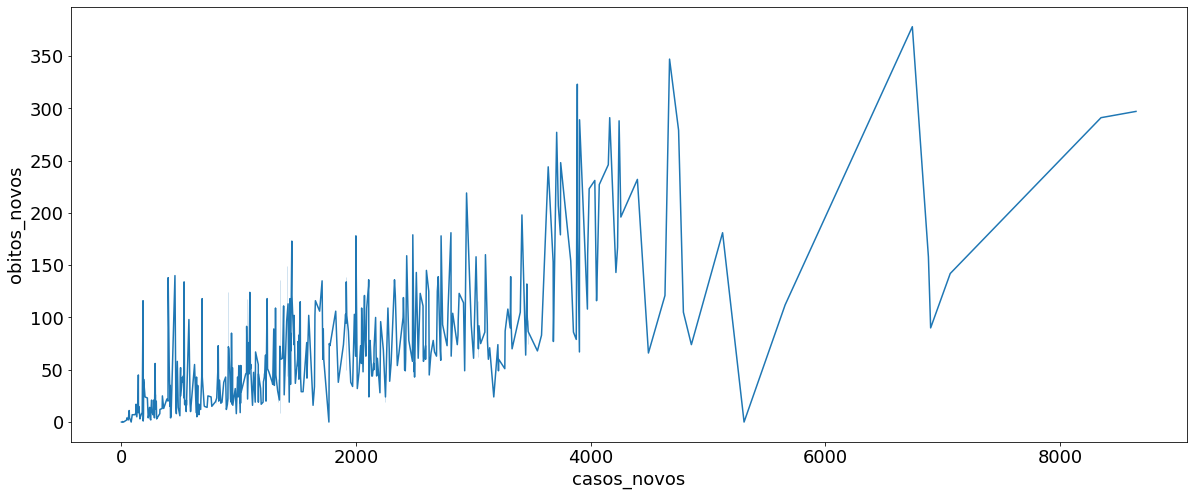

In [34]:
sns.lineplot(x="casos_novos", y="obitos_novos", data=dados_sp)

### Desafio 05: Mover o número de óbitos alguns dias e verificar o resultado da correlação no gráfico

In [35]:
#Vamos criar dois dataframes, um para cada mês inicial de 2021
dados_202101 = dados_sp.query("mes==1 & ano==2021")
dados_202102 = dados_sp.query("mes==2 & ano==2021")

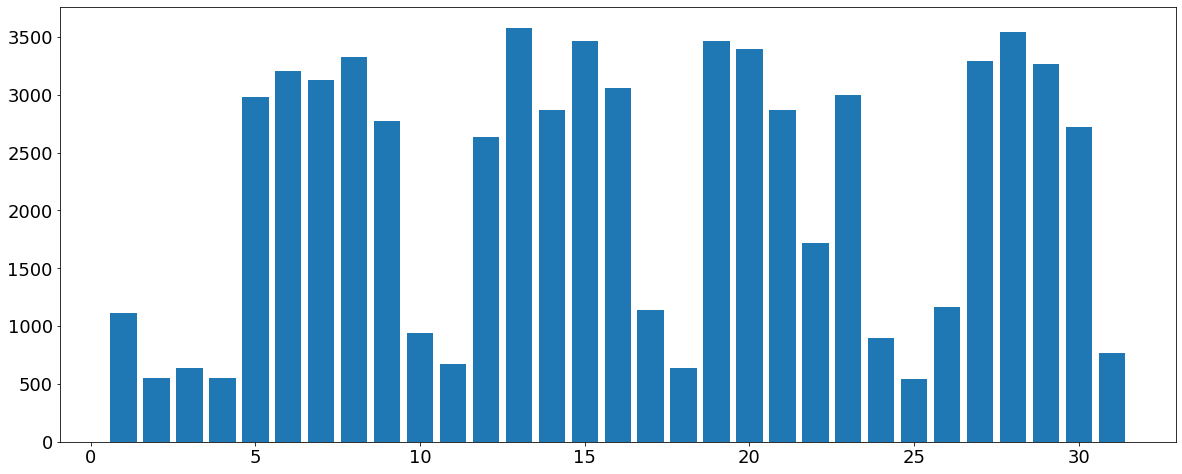

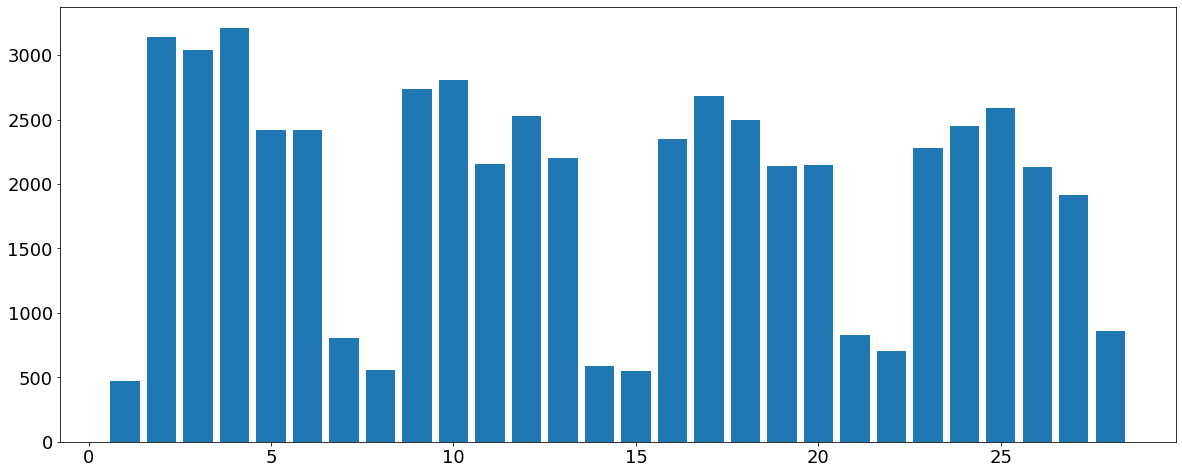

In [36]:
#Vamos plotar pra tentar identificar alguma sazonalidade ou correlação
plt.bar(np.linspace(1,31,31), dados_202101["casos_novos"])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102["casos_novos"])
plt.show()

É possível observar, apenas no aspecto visual, que temos uma menor incidência de casos e óbitos nos finais de semana e feriados. Há uma função de autocorrelação do pandas que nos ajuda com esta tarefa (autocorrelation_plot)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

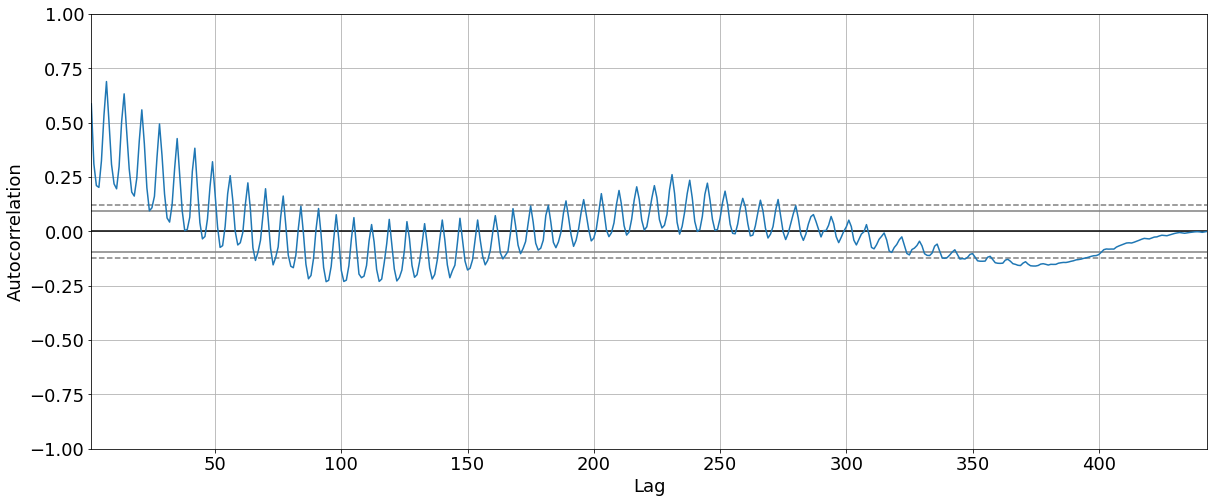

In [37]:
autocorrelation_plot(dados_sp["casos_novos"])

In [38]:
#vamos conparar com um dado gerado aleatoriamente
dados_sp.shape

(443, 31)

In [39]:
aleatorio = np.random.rand(443)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

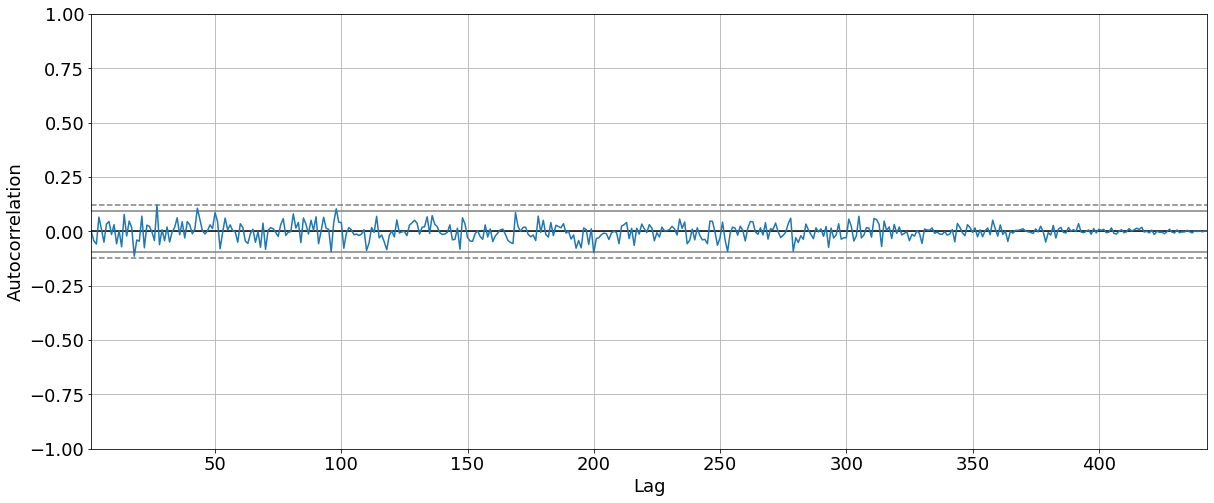

In [40]:
autocorrelation_plot(aleatorio)

### Desafio 06: Função de correlação cruzada entre óbitos e casos (verificar biblioteca statsmodels)